<a href="https://colab.research.google.com/github/ayush9h/PyTorch-DeepLearning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
N = 30
x = torch.randn(N , 1)
y = x + torch.randn(N, 1) / 2

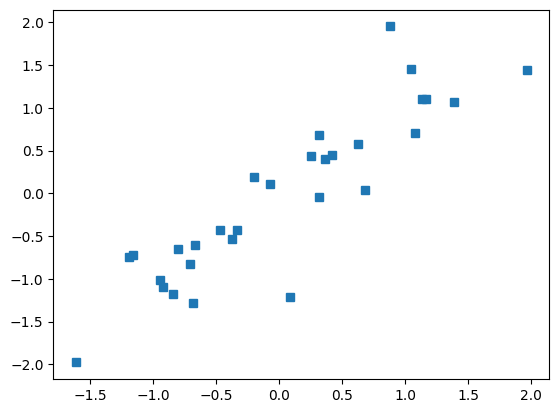

In [4]:
plt.plot(x,y,'s')
plt.show()

In [5]:
ann_reg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)
ann_reg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [6]:
learning_rate = 0.05
lossfun = nn.MSELoss()

optimizer = torch.optim.SGD(ann_reg.parameters(),lr=learning_rate)

In [9]:
numepochs = 500
losses = torch.zeros(numepochs)
for i in range(numepochs):
  yHat = ann_reg(x)

  loss = lossfun(yHat, y)
  losses[i] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [10]:
predictions = ann_reg(x)

In [11]:
print(predictions)

tensor([[-0.7738],
        [-0.2881],
        [ 0.9978],
        [ 0.9636],
        [ 0.5413],
        [-0.9286],
        [-0.1590],
        [ 0.2295],
        [-0.0026],
        [-0.4585],
        [-1.0157],
        [-1.1435],
        [ 1.0512],
        [ 0.6006],
        [ 0.8009],
        [ 1.8885],
        [-0.4214],
        [-0.7573],
        [-0.8912],
        [ 1.3047],
        [ 0.3388],
        [-1.0362],
        [-0.5614],
        [-1.1435],
        [ 0.1663],
        [-0.7954],
        [ 0.2283],
        [-1.1435],
        [ 1.0875],
        [ 0.2759]], grad_fn=<AddmmBackward0>)


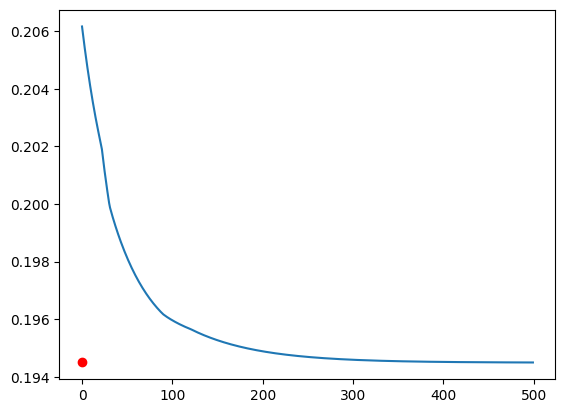

In [19]:
testloss = (predictions - y ).pow(2).mean()

plt.plot(losses.detach(), )
plt.plot(testloss.detach(), 'ro')

In [20]:
testloss

tensor(0.1945, grad_fn=<MeanBackward0>)

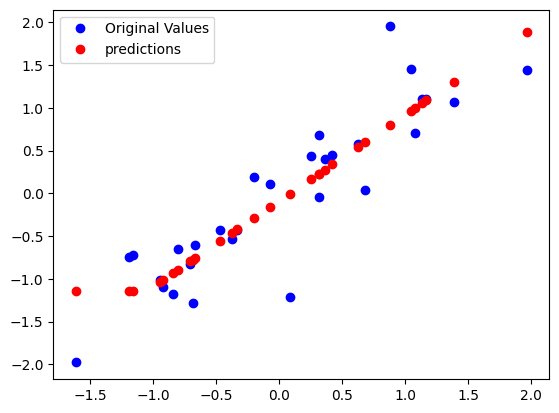

In [26]:
plt.plot(x,y, 'bo', label = "Original Values")
plt.plot(x, predictions.detach(), 'ro', label  = "predictions")
plt.legend()
plt.show()